# Análise de correlação
* Descrição do algoritmo
  * Pegamos uma hora do dia e fazemos o resample pela média
  * 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
raw = pd.read_csv ("../potencias_2018.csv", header=0)

raw['data'] = pd.to_datetime (raw['data'])
raw = raw.set_index(raw.data)
raw = raw.drop ('data', axis=1)
raw

,pa,pb,pc,sa,sb,sc
data,,,,,,
2018-01-01 00:00:00,26.103622,20.374922,23.526793,28.049767,22.545912,24.070171
2018-01-01 00:05:00,25.657446,19.700808,23.302319,27.681798,21.829404,23.791086
2018-01-01 00:10:00,25.394636,19.297124,22.097966,27.038199,21.422686,22.472522
2018-01-01 00:15:00,26.800369,20.555979,23.685910,28.623377,22.750984,24.120945
2018-01-01 00:20:00,26.613076,21.276974,24.561866,28.735167,23.431165,25.233198
2018-01-01 00:25:00,26.269437,19.563629,22.431675,27.895561,21.814794,22.751531
2018-01-01 00:30:00,25.764602,19.474025,22.229371,27.263341,21.484547,22.523331
2018-01-01 00:35:00,24.993493,19.184426,22.028453,26.406912,20.899136,22.294459
2018-01-01 00:40:00,25.499945,19.292275,22.651299,27.111985,21.119326,22.934600


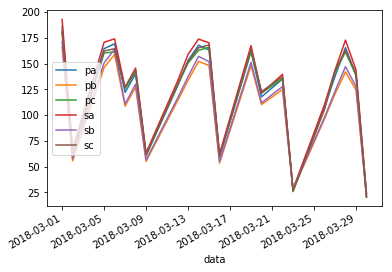

In [3]:
A1 = raw.between_time('18:00:00', '18:59:59').resample('B').mean()
A1 = A1.dropna()
A1['2018-03-01' : '2018-04-01'].plot()

          pa        pb        pc        sa        sb        sc
pa  1.000000  0.996898  0.995219  0.999779  0.997142  0.995548
pb  0.996898  1.000000  0.995296  0.996361  0.999748  0.995898
pc  0.995219  0.995296  1.000000  0.994970  0.993809  0.999940
sa  0.999779  0.996361  0.994970  1.000000  0.996867  0.995442
sb  0.997142  0.999748  0.993809  0.996867  1.000000  0.994595
sc  0.995548  0.995898  0.999940  0.995442  0.994595  1.000000


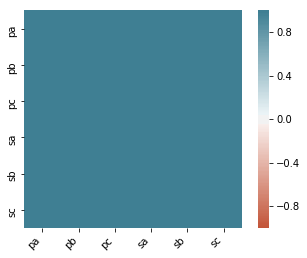

In [4]:
corr = A1.corr()
print (corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/home/benitez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


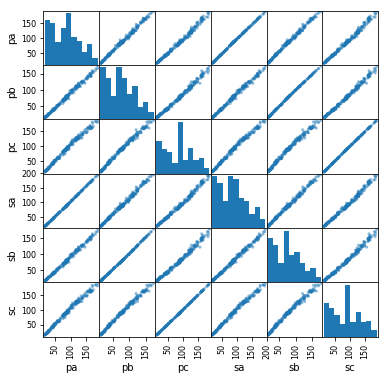

In [5]:
pd.scatter_matrix(A1, figsize=(6, 6))
plt.show()